### DCNN : CNN + Pooling

- 지역 수용 영역 : 지역적인 구조를 인코딩 - 인접한 입력 뉴런의 부분 행렬들을 다음 계층에 있는 한 개의 은닉 뉴런으로 연결
- 풀링 : 맵 출력을 요약, 하나의 특징 맵으로부터 나온 출력에서 공간 인접성을 활용해 부분 행렬 값들을 물리적인 지역에 관련된 의미를 종합적으로 설명하는 출력 값으로 결합

    - max pooling : 관찰한 최대 활성화를 출력
    model.add(MaxPooling2D(pool_size= (2,2))
    - avg pooling :

### LeNet

In [1]:
from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation, Flatten, Dense

from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2018)

/Users/grace/workspace/keras/venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/grace/workspace/keras/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
class LeNet:
    @staticmethod
    def build(input_shape, classes):
        model = Sequential()
        
        # 20 filters
        model.add(Conv2D(20, kernel_size=5, padding='same', input_shape=input_shape))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
        #max pooling 2*2
        
        # 깊은 계층에서 보편적으로 많은 필터를 활용한다
        model.add(Conv2D(50, kernel_size=5, padding='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
        
        model.add(Flatten())
        
        model.add(Dense(500))
        model.add(Activation('relu'))
        
        model.add(Dense(classes))
        model.add(Activation('softmax'))
        return model

In [3]:
NB_EPOCH = 5
BATCH_SIZE = 128
VERBOSE = 1

OPTIMIZER = Adam()
VALIDATION_SPLIT = 0.2
IMG_ROWS, IMG_COLS = 28, 28
NB_CLASSES = 10
INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
K.set_image_dim_ordering('th')

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [7]:
# 1 * 28 * 28 shape
X_train = X_train[:, np.newaxis, :, :]
X_test = X_test[:, np.newaxis, :, :]

print(X_train.shape)
print(X_test.shape)

(60000, 1, 28, 28)
(10000, 1, 28, 28)


In [8]:
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [9]:
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

history = model.fit(X_train, y_train, \
                   batch_size=BATCH_SIZE, epochs=NB_EPOCH,\
                   verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 196s - loss: 0.1872 - acc: 0.9436 - val_loss: 0.0629 - val_acc: 0.9805
Epoch 2/5
48000/48000 [==============================] - 153s - loss: 0.0497 - acc: 0.9852 - val_loss: 0.0460 - val_acc: 0.9869
Epoch 3/5
48000/48000 [==============================] - 99s - loss: 0.0331 - acc: 0.9895 - val_loss: 0.0394 - val_acc: 0.9873
Epoch 4/5
48000/48000 [==============================] - 97s - loss: 0.0265 - acc: 0.9913 - val_loss: 0.0447 - val_acc: 0.9871
Epoch 5/5
 9952/10000 [============================>.] - ETA: 0sTest score: 0.031803440114003025
Test accuracy: 0.9899


Text(0.5, 1.0, 'model accuracy')

Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'epoch')

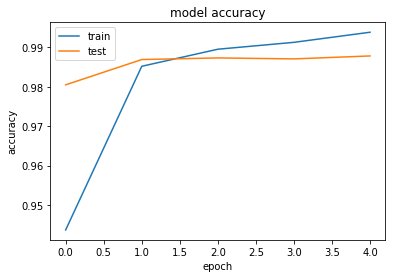

In [10]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Text(0.5, 1.0, 'model loss')

Text(0, 0.5, 'loss')

Text(0.5, 0, 'epoch')

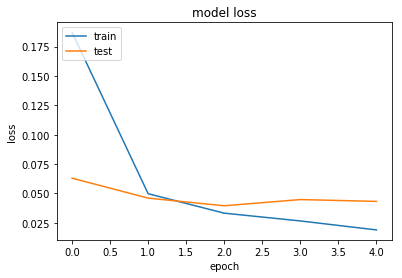

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

- 심층 신경망은 단순 신경망보다 더 성능이 좋고, 데이터가 줄어들었을 때 활씬 더 높은 정확도를 보이는 것을 알 수 있다.